In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt                       
import numpy as np                                   
import pandas as pd                                  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from random import sample
import math


import warnings                                       
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/Kaggle/derby/dataset/'

In [ ]:
df = pd.read_csv(path+'nyra_2019_complete.csv')
df.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090


## Preprocessing

Dropping irrelevant columns and duplicated rows: <br/>
'race_date' just doesnt give us any information other than a timestamp, the 'trakus_index','latitude','longitude' and 'distance_id' only gives us information about geographical location of the horse so its also not so helpful.

In [ ]:
df.sample(10)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
1275491,BEL,2019-06-07,9,7,13,40.713911,-73.722971,1000,I,FM,76,STK,600000,519,115,John R. Velazquez,790
2766196,BEL,2019-05-09,4,1,139,40.716957,-73.723299,800,T,GD,162,CLM,60000,440,118,Jose L. Ortiz,1040
779322,SAR,2019-07-21,5,1,386,43.072471,-73.770182,900,D,FT,76,MSW,90000,244,124,Ricardo Santana Jr.,1030
3422538,BEL,2019-06-13,2,8,25,40.715896,-73.718049,800,D,SY,48,MSW,62000,337,118,Joel Rosario,720
4067896,AQU,2019-03-03,5,2,154,40.675063,-73.830220,550,D,FT,50,MSW,60000,258,120,Rajiv Maragh,960
1738106,SAR,2019-08-25,5,9,108,43.072397,-73.764671,550,T,FM,56,AOC,95000,311,124,Irad Ortiz Jr.,470
3998811,BEL,2019-07-04,8,1,89,40.716286,-73.720692,800,T,FM,182,STK,100000,520,116,Manuel Franco,950
3158479,AQU,2019-02-03,6,8,112,40.674125,-73.827112,650,D,FT,36,MSW,60000,326,120,Oscar Gomez,4400
2411679,BEL,2019-05-11,4,5,98,40.716480,-73.720423,900,D,FT,20,STK,300000,308,116,Irad Ortiz Jr.,255
3347023,BEL,2019-05-26,7,9,104,40.715784,-73.719927,850,I,FM,80,STR,55000,445,120,Javier Castellano,325


In [ ]:
modeling_data = df.drop(columns=['race_date','trakus_index','latitude','longitude','distance_id'])

In [ ]:
modeling_data.duplicated().sum()

5213349

In [ ]:
modeling_data =modeling_data.drop_duplicates()
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 5227892
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   track_id         15081 non-null  object
 1   race_number      15081 non-null  int64 
 2   program_number   15081 non-null  object
 3   course_type      15081 non-null  object
 4   track_condition  15081 non-null  object
 5   run_up_distance  15081 non-null  int64 
 6   race_type        15081 non-null  object
 7   purse            15081 non-null  int64 
 8   post_time        15081 non-null  int64 
 9   weight_carried   15081 non-null  int64 
 10  jockey           15081 non-null  object
 11  odds             15081 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.5+ MB


Now after cleaning our data , we have to encode our categorical data to numeric representation.<br/>
Columns to be encoded: 'track_id','program_number', 'course_type', 'track_condition', 'race_type' and 'jockey'. <br/>
(using LabelEncoder)

In [ ]:
len(modeling_data)

15081

In [ ]:
modeling_data_analysis = modeling_data.copy()

In [ ]:
encoded_columns=['track_id','program_number', 'course_type', 'track_condition', 'race_type','jockey']

encodes_dict = {}
for col in encoded_columns:
    le = LabelEncoder()
    modeling_data[col] = modeling_data[col].astype('str') 
    modeling_data[col] = le.fit_transform(modeling_data[col])
    encodes_dict[col] = le.classes_

Data scaling and standardization:<br/>
* MinMaxScaler for categorical data
* StandardScaler for continuous data.

In [ ]:
categorical_columns = ['track_id','race_number','program_number', 'course_type', 'track_condition','race_type','jockey']
continuous_columns = [col for col in modeling_data.columns if col not in categorical_columns]

for col in modeling_data.columns:
    if col in categorical_columns:
        scaler = MinMaxScaler()
        
    elif col in continuous_columns:
        scaler = StandardScaler(with_mean=True , with_std=True)
        
    scaler.fit(modeling_data[col].to_numpy().reshape(-1, 1))
    modeling_data[col] = scaler.transform(modeling_data[col].to_numpy().reshape(-1, 1))

In [ ]:
modeling_data.sample(10)

,track_id,race_number,program_number,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
3526025,0.5,0.750000,0.885714,1.00,0.333333,0.626613,1.000000,-0.373417,0.365775,0.153722,0.785311,-0.343734
2387002,0.0,0.416667,0.914286,0.00,0.333333,-0.401470,0.272727,-0.425871,-0.565106,0.436405,0.237288,-0.487177
3688499,0.0,0.250000,0.857143,0.75,0.333333,-0.509690,0.363636,-0.119889,-0.693377,-0.411644,0.435028,-0.415455
2582742,1.0,0.083333,0.914286,1.00,0.000000,-1.213116,0.181818,-0.277251,-1.133164,-0.128961,0.672316,1.751568
4367312,0.5,0.500000,0.742857,1.00,0.000000,1.113601,0.363636,-0.076177,-0.000714,-0.411644,0.785311,0.050736
2644227,0.5,0.583333,0.057143,0.25,0.000000,-0.022703,0.818182,-0.251024,0.109233,-0.694327,0.429379,-0.031231
5037433,0.0,0.166667,0.714286,1.00,0.333333,0.518394,0.727273,0.142382,-0.667723,-0.694327,0.672316,-0.625498
3212750,0.5,0.166667,0.828571,0.00,0.166667,-0.563799,0.000000,-0.058692,-0.026368,-0.128961,0.372881,-0.410332
1536606,1.0,0.500000,0.514286,0.25,0.000000,0.680723,0.090909,-0.006238,0.105568,0.436405,0.598870,1.559456
282806,0.0,0.166667,0.028571,0.00,0.333333,-0.590854,0.000000,-0.119889,-0.631074,0.436405,0.542373,-0.666482


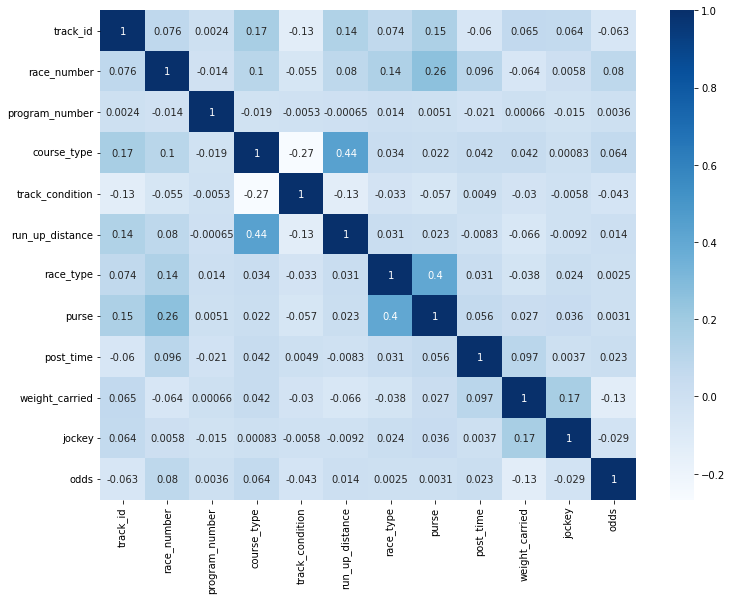

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(modeling_data.corr(),cmap='Blues',annot=True)

Attributes that show high degree of coreelation: <br/>
course_type and run_up_distance = 0.43<br/>
purse and race_type = 0.42

# K Means Clustering

The aim is to find any patterns/ understand the racing data more, so k means clustering followed by agglomerative clustering(hierarchial clustering) will be implemented.

K Means Clustering

In [ ]:
clustering_result = pd.DataFrame(modeling_data.index)

In [ ]:
K = range(2,10)
scorelist = []
for k in K:
    kmodel = KMeans(n_clusters=k, random_state=42)
    clust = kmodel.fit_predict(modeling_data)
    clustering_result[f'KMean_{k}'] = clust
    score = silhouette_score(modeling_data,clust,metric='euclidean')
    scorelist.append((k, score)) 
kmeans_res = pd.DataFrame(scorelist, columns=['k','score']) 


In [ ]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly_express as px
fig = px.line(kmeans_res, x='k',y='score')
fig.show()

From the knee-plot, optimal value of k = 6.


# Agglomerative Clustering

Agglomerative clustering uses a bottom-up approach, wherein each data point starts in its own cluster. These clusters are then joined greedily, by taking the two most similar clusters together and merging them. Agglomerative clustering does not require pre-defined number of clusters.

In [ ]:
N = range(2,10)
scorelist = []
for n in N:
    kmodel = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    clust = kmodel.fit_predict(modeling_data)
    clustering_result[f'Agglomerative_{n}'] = clust
    score = silhouette_score(modeling_data,clust,metric='euclidean')
    scorelist.append((n, score)) 
affinity_res = pd.DataFrame(scorelist, columns=['n','score']) 

In [ ]:
px.line(affinity_res, x='n',y='score')

As we can see from the graphs, we got different results for each clustering method. The K means graph is a bit oscilating until 5 while in the Agglomerative graph we got a nice knee shape, therefore we will proceed with this algorithm with N=6 as number of clusters.

In [ ]:
clustering_result['Agglomerative_6'].value_counts()


0    11321
3     1447
2      980
4      904
1      353
5       76
Name: Agglomerative_6, dtype: int64

In [ ]:
modeling_data_analysis['Cluster'] = clustering_result.set_index(modeling_data_analysis.index)['Agglomerative_6'] + 1

In [ ]:
modeling_data['Cluster'] = clustering_result.set_index(modeling_data_analysis.index)['Agglomerative_6'] + 1

In [ ]:
modeling_data_analysis.sample(5)

,track_id,race_number,program_number,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,Cluster
2434336,SAR,9,2,T,FM,36,STK,1000000,600,122,Manuel Franco,520,2
884108,SAR,3,4,T,YL,126,AOC,95000,212,126,Joel Rosario,220,4
3471101,BEL,2,5,T,GD,50,MSW,80000,202,118,Kendrick Carmouche,1000,1
1811218,SAR,9,4,D,FT,45,STK,350000,547,118,Irad Ortiz Jr.,340,1
5099240,SAR,6,1,T,FM,130,STR,60000,404,125,Ricardo Santana Jr.,1220,4


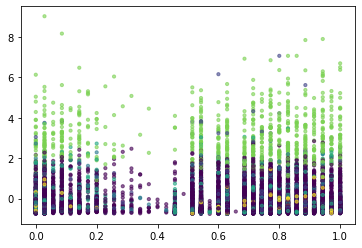

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(modeling_data.program_number, modeling_data.odds, c=modeling_data_analysis.Cluster, alpha = 0.6, s=10)

In [ ]:
import plotly.graph_objs as go
Scene = dict(xaxis = dict(title  = 'program_number'),yaxis = dict(title  = 'race_type'),zaxis = dict(title  = 'odds'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = modeling_data_analysis.Cluster
trace = go.Scatter3d(x=modeling_data_analysis['program_number'], y=modeling_data_analysis['race_type'], z=modeling_data_analysis['odds'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(modeling_data_analysis['odds'], modeling_data_analysis['Cluster'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.501


In [ ]:
from plotly.subplots import make_subplots


In [ ]:
def categorical_columns_plotter(data,col):
    specs = [[{'type':'domain'}, {'type':'domain'} ,{'type':'domain'}] , [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
    fig = make_subplots(rows=2, cols=3, specs=specs , subplot_titles=['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6'])


    for i in range(1,7):
        pos = [(1,1),(1,2),(1,3),(2,1),(2,2),(2,3)]
        fig_data = data.query(f'Cluster == {i}')[col].value_counts(normalize=True)
        fig.add_trace(go.Pie(labels = fig_data.index , values = fig_data, name= f'Cluster {i}'), pos[i-1][0] , pos[i-1][1])

    fig.update_traces(hoverinfo='label+percent+name', textinfo='none')
    fig.update(layout_title_text=f'Clusters {col} distribution',
               layout_showlegend=False)

    fig = go.Figure(fig)
    return fig.show()

In [ ]:
categorical_columns=['race_type','course_type','weight_carried','track_condition']
for col in categorical_columns:
    categorical_columns_plotter(modeling_data_analysis,col)

In [ ]:
modeling_data

,track_id,race_number,program_number,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,Cluster
0,0.0,0.666667,0.828571,0.00,0.333333,-0.509690,0.181818,-0.513295,0.028605,-0.128961,0.028249,0.312009,1
297,0.0,0.500000,0.542857,0.75,0.000000,-0.239141,0.181818,-0.189828,0.109233,-0.128961,0.672316,-0.587075,1
572,0.5,0.750000,1.000000,0.25,0.000000,0.626613,0.090909,0.011247,0.776242,0.153722,0.237288,0.534859,1
845,0.5,0.416667,0.828571,0.25,0.000000,1.221820,0.181818,-0.207312,-0.000714,0.719089,0.672316,-0.092707,1
1125,1.0,0.166667,0.828571,1.00,0.333333,0.193736,0.181818,-0.277251,-0.741021,0.436405,0.372881,-0.138814,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226195,0.0,0.250000,0.600000,0.75,1.000000,-0.293251,0.727273,0.360942,-1.133164,-0.128961,0.435028,-0.471808,1
5226482,0.5,0.500000,0.971429,0.25,1.000000,1.600588,0.727273,0.142382,0.732263,-0.128961,0.672316,-0.251520,4
5226784,0.5,0.750000,0.742857,1.00,0.333333,-0.103867,0.727273,8.010512,0.494046,0.436405,0.299435,0.219795,2
5227338,0.5,0.750000,0.685714,1.00,0.333333,-0.103867,0.727273,8.010512,0.494046,0.436405,0.920904,1.200847,2
